# Concurso Aqruivo

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define a query a ser executada no Arquivo.pt
query = 'depressão'
url = f'https://arquivo.pt/textsearch?q={query}&maxItems=1000&skipDuplicates=true'

# Faz a requisição ao Arquivo.pt e extrai os dados
response = requests.get(url)
data = response.json()

# Transforma os dados em um dataframe do pandas
df = pd.DataFrame(data['response_items'])
print(df.columns)

# Converte as datas para o formato correto
df['tstamp'] = pd.to_datetime(df['tstamp'])

# Agrupa as entradas por ano e conta o número de ocorrências
df_grouped = df.groupby(df['tstamp'].dt.year).count()

# Cria um gráfico de linha mostrando a evolução do tema ao longo dos anos
fig, ax = plt.subplots()
ax.plot(df_grouped.index, df_grouped['tstamp'])
ax.set_xlabel('Ano')
ax.set_ylabel('Número de ocorrências')
ax.set_title(f'Evolução do tema "{query}" no Arquivo.pt')
plt.show()


C:\Users\bernc\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


Index(['title', 'originalURL', 'linkToArchive', 'tstamp', 'contentLength',
       'digest', 'mimeType', 'encoding', 'date', 'linkToScreenshot',
       'linkToNoFrame', 'linkToExtractedText', 'linkToMetadata',
       'linkToOriginalFile', 'snippet', 'fileName', 'collection', 'offset'],
      dtype='object')


C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 640x480 with 1 Axes>

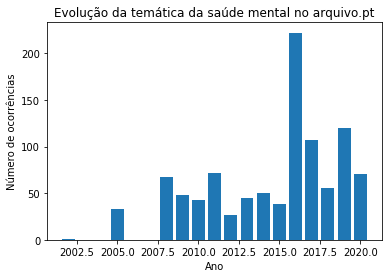

In [2]:
# Cria o gráfico de barras
plt.bar(df_grouped.index, df_grouped['tstamp'])

# Define os títulos dos eixos e do gráfico
plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.title('Evolução da temática da saúde mental no arquivo.pt')

# Exibe o gráfico
plt.show()

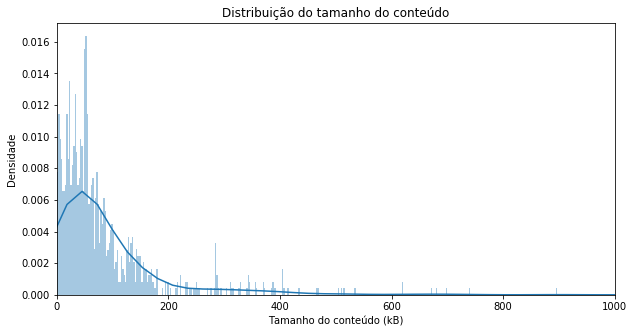

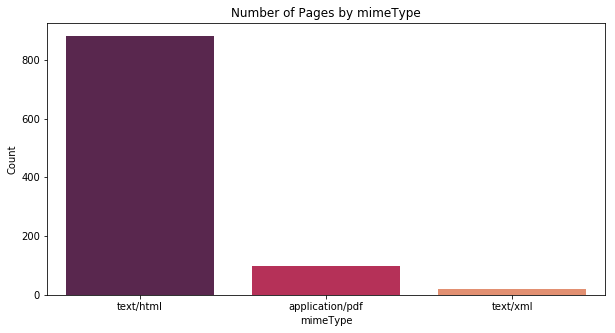

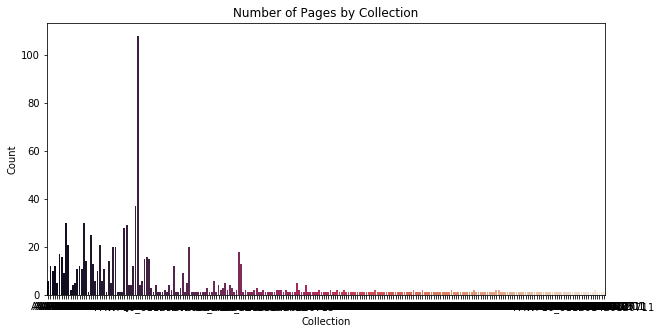

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot 1: Distribution of content length
plt.figure(figsize=(10, 5))
sns.distplot(df['contentLength']/1000, bins=1000)
plt.title('Distribuição do tamanho do conteúdo')
plt.xlabel('Tamanho do conteúdo (kB)')
plt.ylabel('Densidade')
plt.xlim(0,1000)
plt.show()

# Plot 2: Number of pages by mimeType
plt.figure(figsize=(10, 5))
sns.countplot(x='mimeType', data=df, palette='rocket')
plt.title('Number of Pages by mimeType')
plt.xlabel('mimeType')
plt.ylabel('Count')
plt.show()

# Plot 3: Number of pages by collection
plt.figure(figsize=(10, 5))
sns.countplot(x='collection', data=df, palette='rocket')
plt.title('Number of Pages by Collection')
plt.xlabel('Collection')
plt.ylabel('Count')
plt.show()


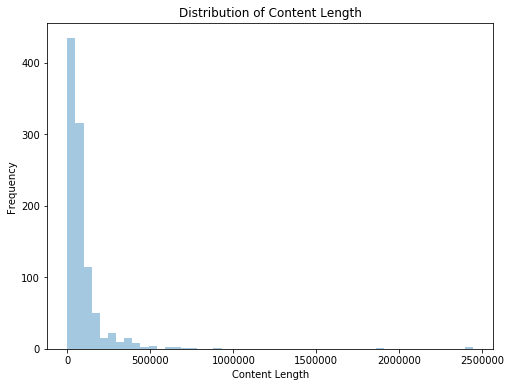

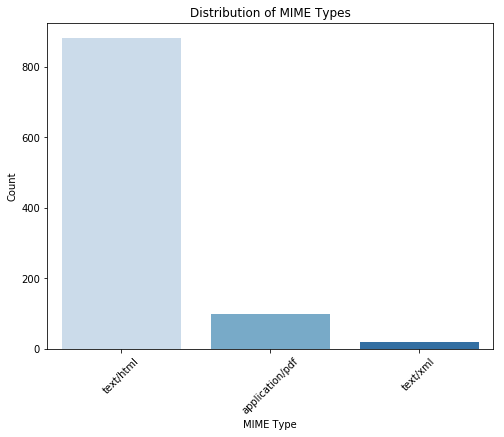

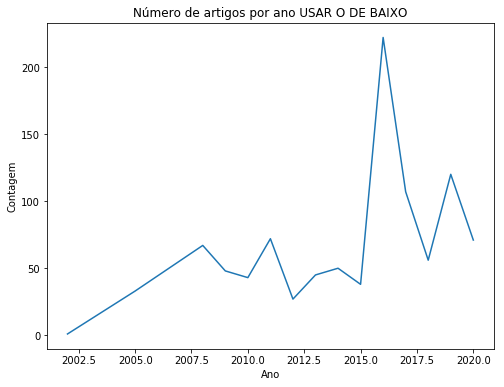

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the timestamp column to a pandas datetime object
df['tstamp'] = pd.to_datetime(df['tstamp'])

# Plot the distribution of content length
plt.figure(figsize=(8,6))
sns.distplot(df['contentLength'], kde=False, bins=50)
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Distribution of Content Length')
plt.show()

# Plot the distribution of MIME types
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='mimeType', palette='Blues')
plt.xlabel('MIME Type')
plt.ylabel('Count')
plt.title('Distribution of MIME Types')
plt.xticks(rotation=45)
plt.show()

# Group the entries by year and count the number of occurrences
yearly_counts = df.groupby(df['tstamp'].dt.year)['title'].count()

# Plot the yearly counts
plt.figure(figsize=(8,6))
sns.lineplot(data=yearly_counts)
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Número de artigos por ano USAR O DE BAIXO')
plt.show()


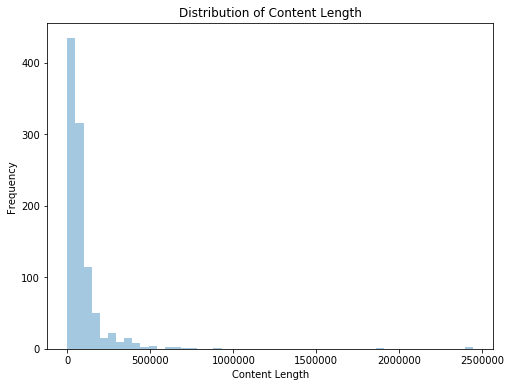

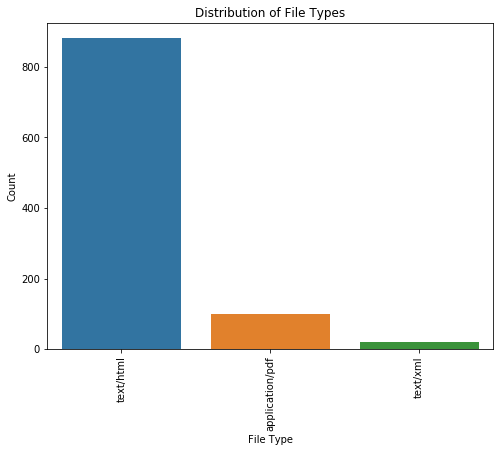

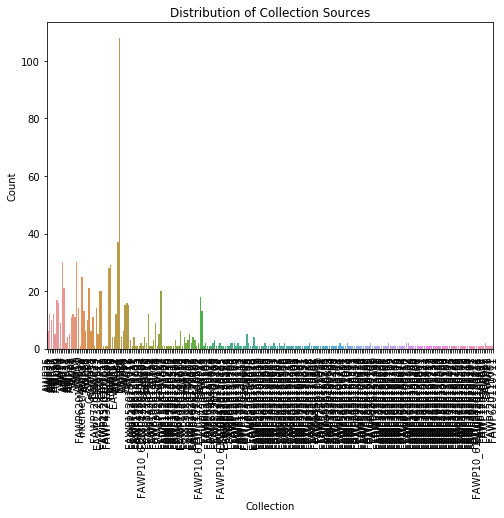

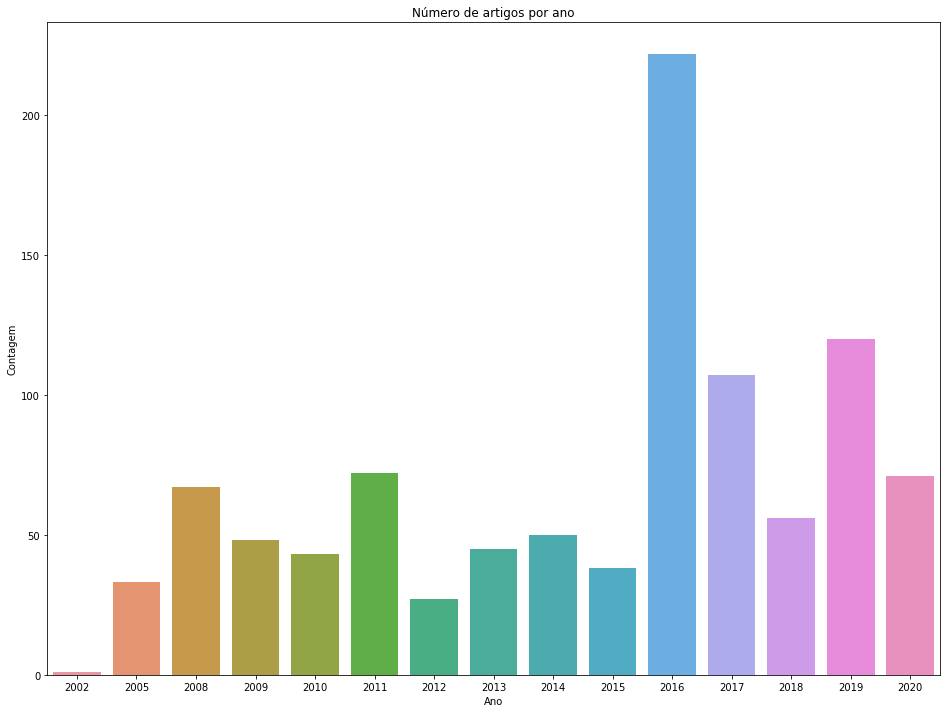

0      2017
1      2019
2      2016
3      2015
4      2011
       ... 
995    2011
996    2011
997    2008
998    2017
999    2008
Name: tstamp, Length: 1000, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of content length
plt.figure(figsize=(8,6))
sns.distplot(df['contentLength'], kde=False, bins=50)
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Distribution of Content Length')
plt.show()

# Plot the distribution of file types
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='mimeType')
plt.xticks(rotation=90)
plt.xlabel('File Type')
plt.ylabel('Count')
plt.title('Distribution of File Types')
plt.show()

# Plot the distribution of collection sources
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='collection')
plt.xticks(rotation=90)
plt.xlabel('Collection')
plt.ylabel('Count')
plt.title('Distribution of Collection Sources')
plt.show()

# Plot the number of entries by year
plt.figure(figsize=(16,12))
sns.countplot(data=df, x=df['tstamp'].dt.year)
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Número de artigos por ano')
plt.show()


print(df['tstamp'].dt.year)

Text(0, 0.5, 'Collection')

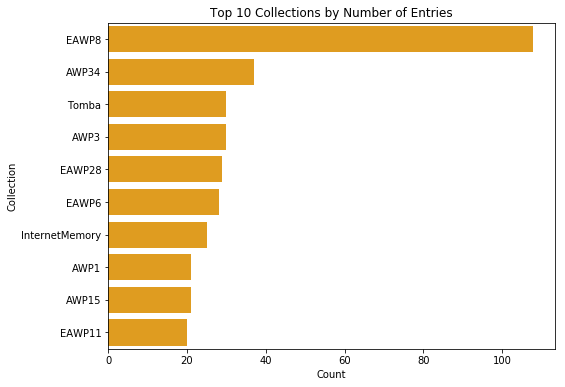

In [6]:
plt.figure(figsize=(8, 6))
collection_counts = df['collection'].value_counts()[:10]
sns.barplot(x=collection_counts.values, y=collection_counts.index, color='orange')
plt.title('Top 10 Collections by Number of Entries')
plt.xlabel('Count')
plt.ylabel('Collection')

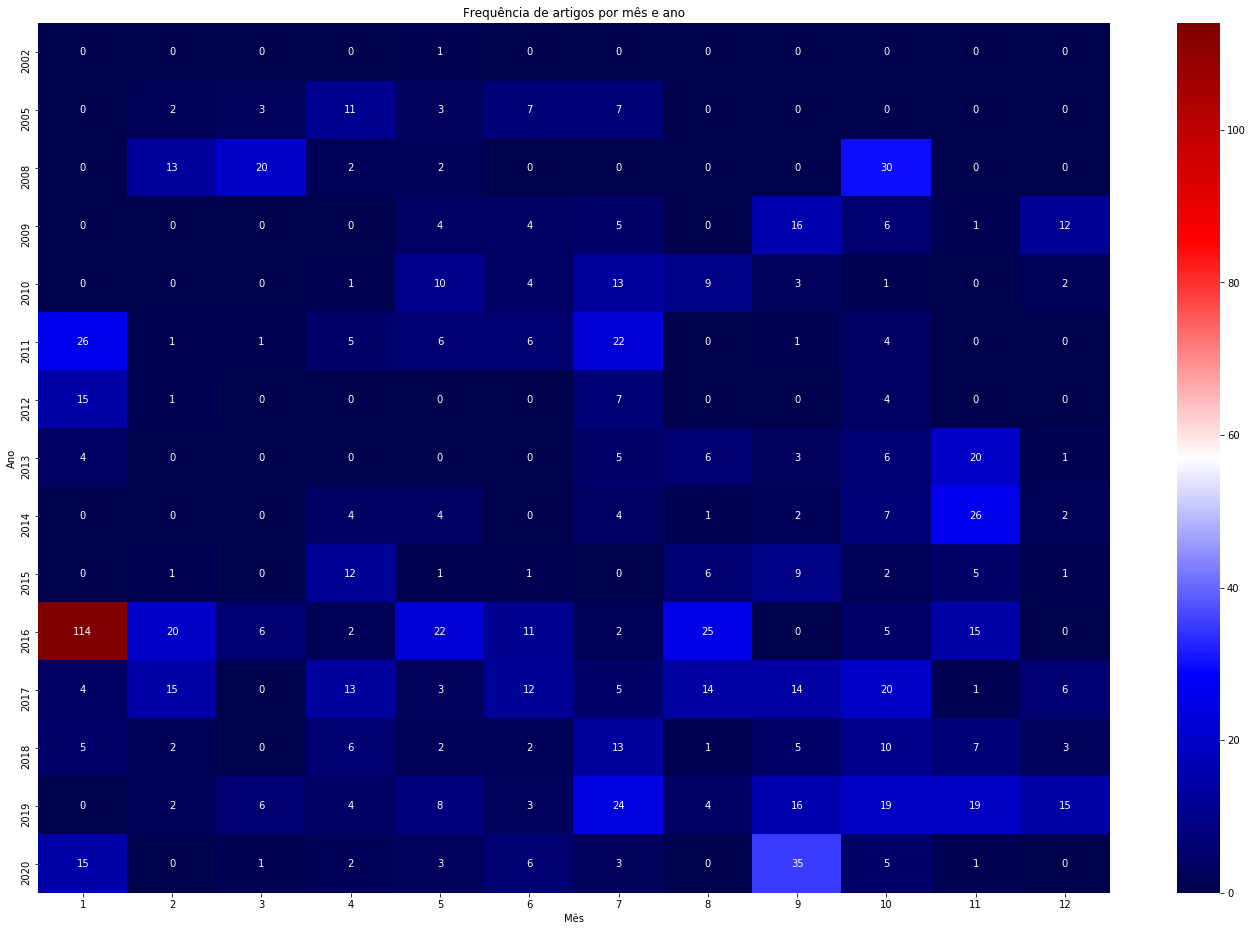

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'tstamp' column to a datetime object
df['tstamp'] = pd.to_datetime(df['tstamp'])

monthly_counts = df.groupby([df['tstamp'].dt.year, df['tstamp'].dt.month])['title'].count().unstack().fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(monthly_counts, cmap='seismic', annot=True, fmt='d')
plt.title('Frequência de artigos por mês e ano')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()



C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

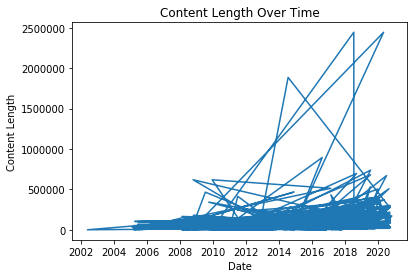

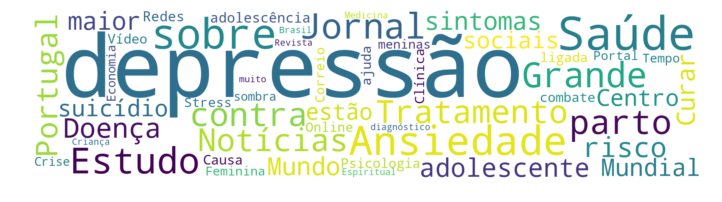

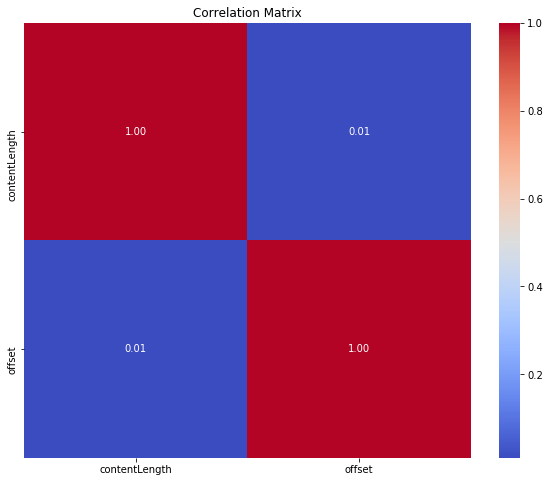

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Convert tstamp column to datetime format
df['tstamp'] = pd.to_datetime(df['tstamp'])

# Plot content length over time
plt.plot(df['tstamp'], df['contentLength'])
plt.title('Content Length Over Time')
plt.xlabel('Date')
plt.ylabel('Content Length')
plt.show()

# Create word cloud of article titles
text = ' '.join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=1600, height=400, max_words=50, collocations = False,min_word_length = 5,background_color='white',repeat=False).generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


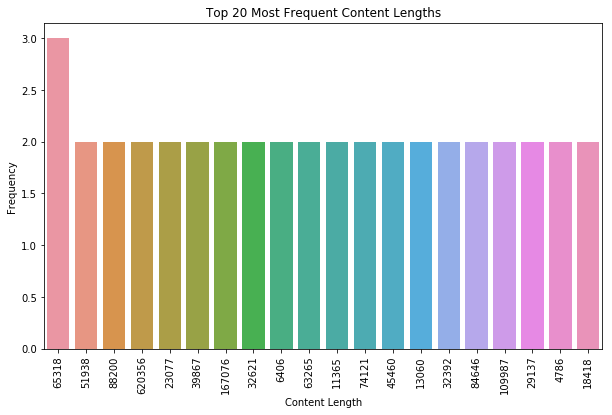

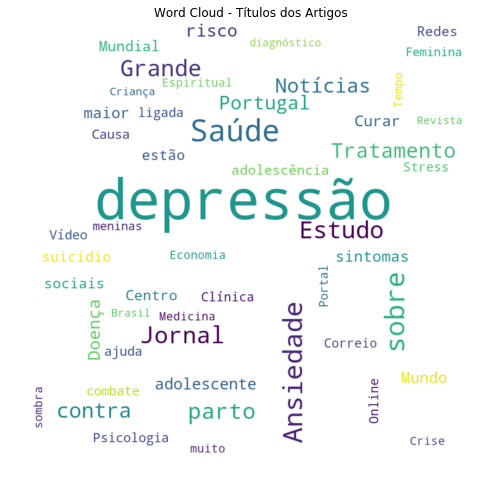

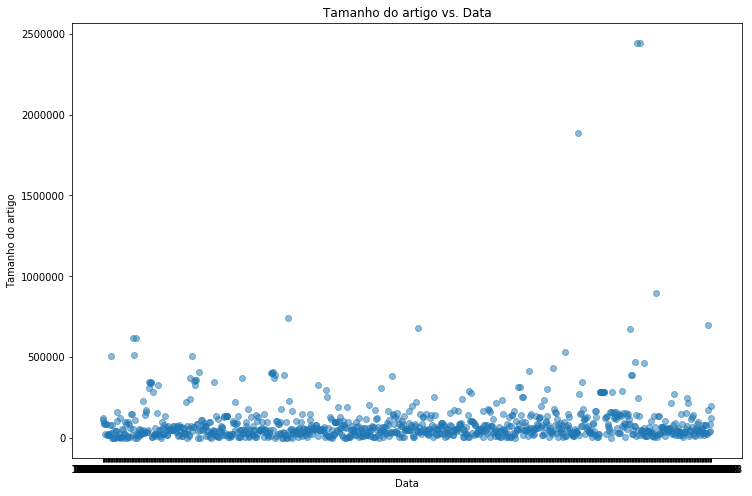

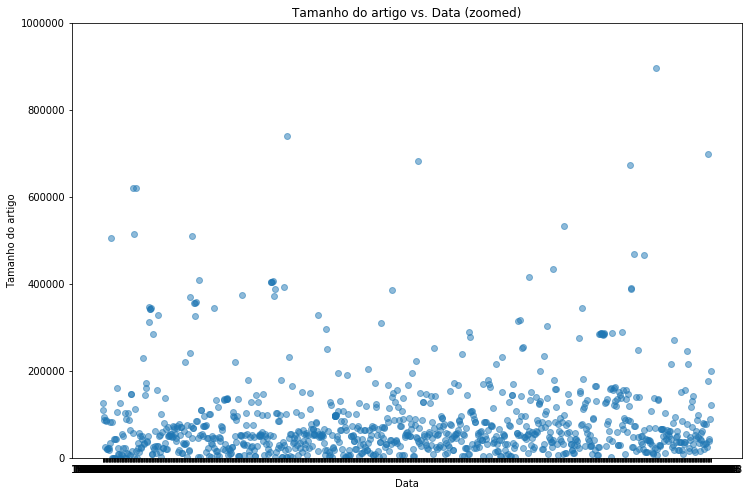

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Create a bar plot of the top 20 most frequent content lengths
plt.figure(figsize=(10,6))
sns.countplot(x='contentLength', data=df, order=df['contentLength'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent Content Lengths')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Create a word cloud of the article titles
title_text = ' '.join(df['title'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=800,max_words=50, collocations = False,min_word_length = 5,background_color='white',repeat=False).generate(title_text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Títulos dos Artigos')
plt.show()

# Create a scatter plot of content length vs. date
plt.figure(figsize=(12,8))
plt.scatter(df['date'], df['contentLength'], alpha=0.5)
plt.title('Tamanho do artigo vs. Data')
plt.xlabel('Data')
plt.ylabel('Tamanho do artigo')
plt.show()

# Create a scatter plot of content length vs. date; ZOOMED
plt.figure(figsize=(12,8))
plt.scatter(df['date'], df['contentLength'], alpha=0.5)
plt.ylim(0,1000000)
plt.title('Tamanho do artigo vs. Data (zoomed)')
plt.xlabel('Data')
plt.ylabel('Tamanho do artigo')
plt.show()


C:\Users\bernc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


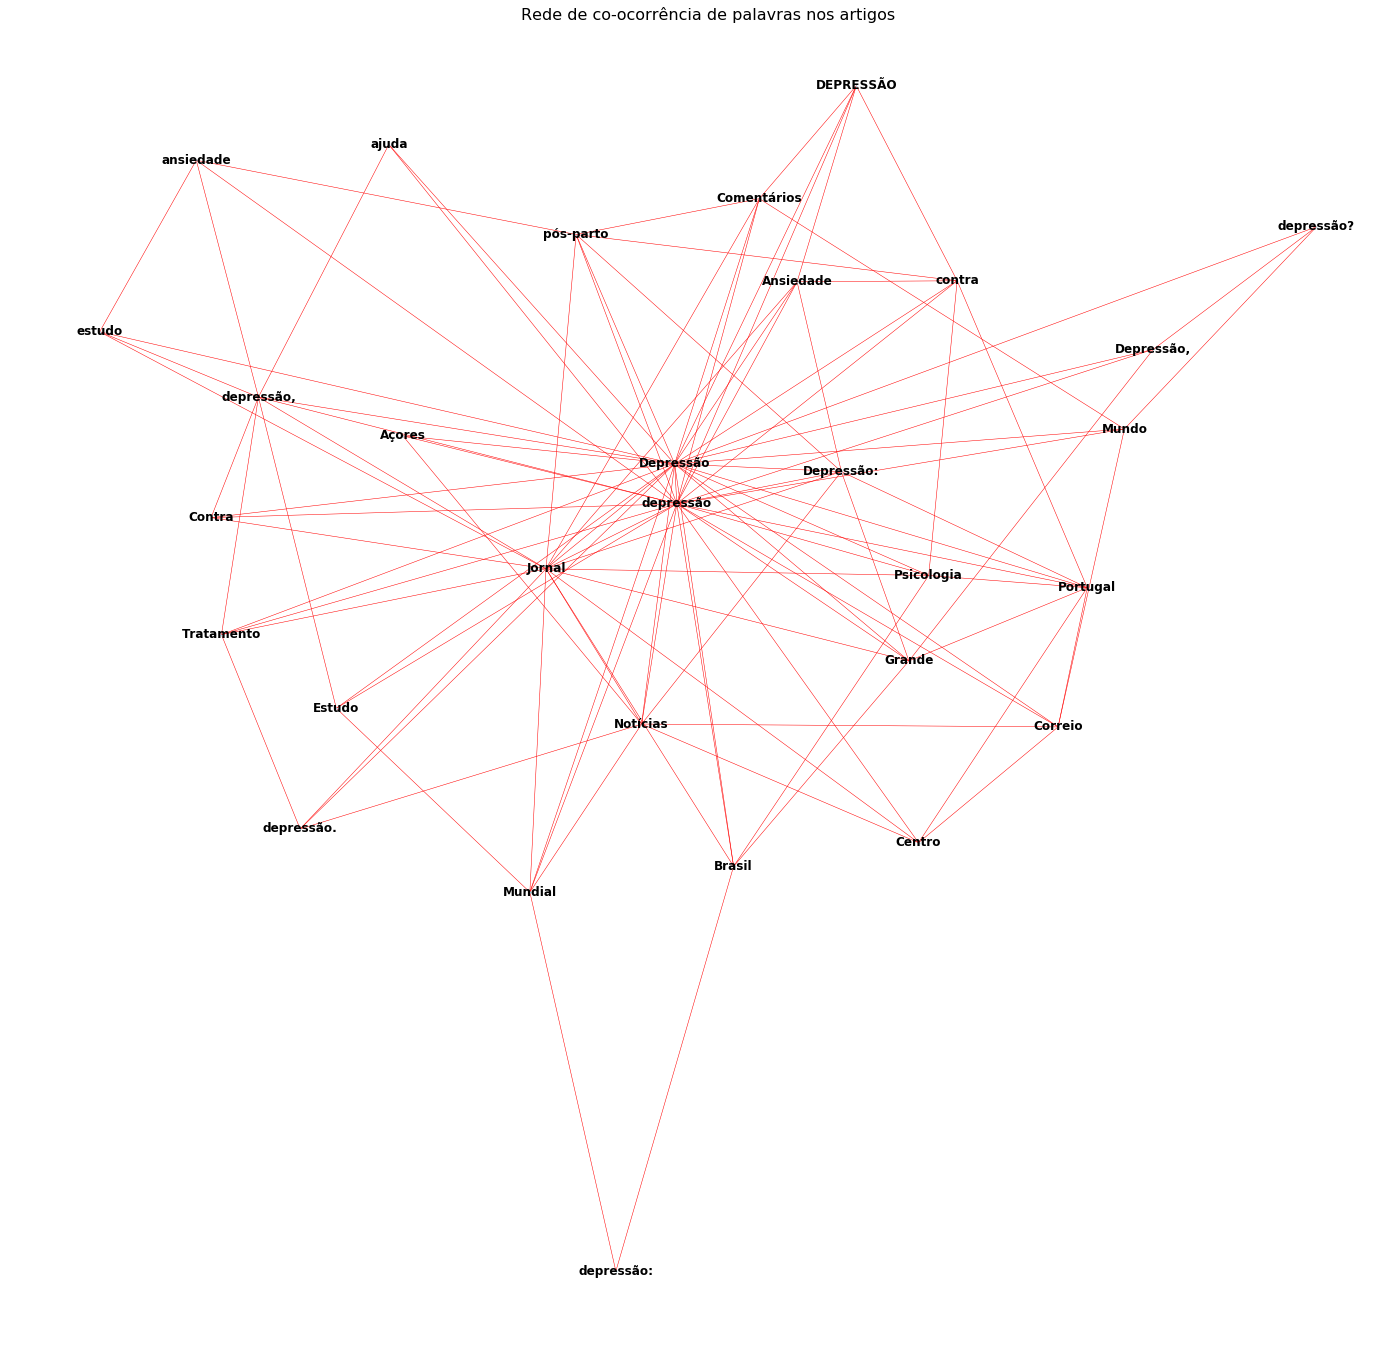

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Add nodes and edges
words = text.split()
#print(words)
for i, word in enumerate(words):
    if word.lower() not in ['para', 'de', 'na', 'com', 'dos']:
        G.add_node(word)
        for j in range(i+1, min(i+5, len(words))):
            if words[j].lower() not in ['para', 'de', 'na', 'com', 'dos']:
                G.add_node(words[j])
                if not G.has_edge(word, words[j]):
                    G.add_edge(word, words[j])

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)



filtered_nodes = [n for n in G.nodes if len(n) > 4 and not any(w in n.lower().split() for w in 
                                                               ['Saude','saúde','Saúde','sobre','mental:','mental,','MENTAL','Mental','saude','para','da', 'de', 'na', 'em','no','do','com', 'dos'])]


# Select top 15 nodes based on degree centrality
top_nodes = sorted(filtered_nodes, key=degree_centrality.get, reverse=True)[:30]

# Create subgraph with top 15 nodes
subgraph = G.subgraph(top_nodes)

# Calculate positions for nodes
pos = nx.spring_layout(subgraph, seed=60)

# Draw network
fig = plt.figure(figsize=(24, 24))
nx.draw_networkx(subgraph, pos=pos, node_color='lightblue', cmap='heat', edge_color='red',
                 with_labels=True, font_size=12, font_weight='bold',
                 width=0.5, node_size=[v * 1000 for v in degree_centrality.values() if v in subgraph.nodes])
plt.title('Rede de co-ocorrência de palavras nos artigos', fontsize=16)
plt.axis('off')
plt.show()

C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\bernc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


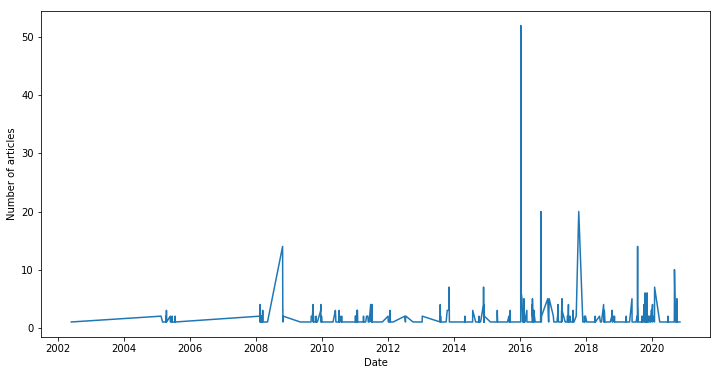

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Unix timestamps to datetime objects
df['date'] = pd.to_datetime(df['date'], unit='s')

# Group by date and count the number of articles
articles_per_day = df.groupby(df['date'].dt.date).size()

# Plot the number of articles per day
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(articles_per_day.index, articles_per_day.values)
ax.set_xlabel('Date')
ax.set_ylabel('Number of articles')
plt.show()


0     2017-12-23 10:21:22
1     2019-09-06 19:20:28
2     2016-06-01 05:42:17
3     2015-04-14 14:20:52
4     2011-05-27 16:18:42
              ...        
995   2011-07-04 21:36:13
996   2011-07-11 17:07:53
997   2008-03-05 04:54:30
998   2017-06-14 00:36:55
999   2008-02-12 12:05:03
Name: date, Length: 1000, dtype: datetime64[ns]


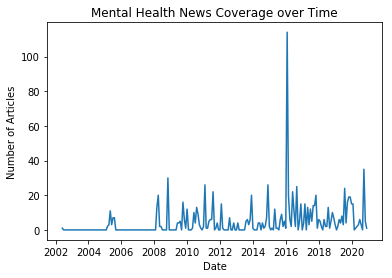

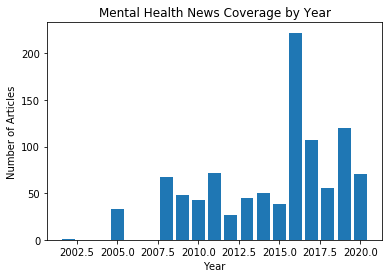

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

print(df['date'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the articles by month and count the number of articles in each month
monthly_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()

# Create a line plot of the monthly counts
plt.plot(monthly_counts)
plt.title('Mental Health News Coverage over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Group the articles by year and count the number of articles in each year
yearly_counts = df.groupby(pd.Grouper(key='date', freq='Y')).size()

# Create a bar plot of the yearly counts
plt.bar(yearly_counts.index.year, yearly_counts.values)
plt.title('Mental Health News Coverage by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()


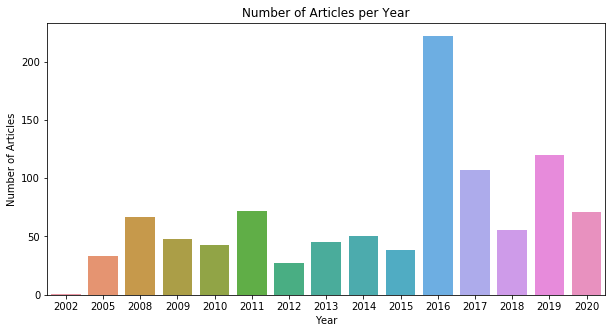

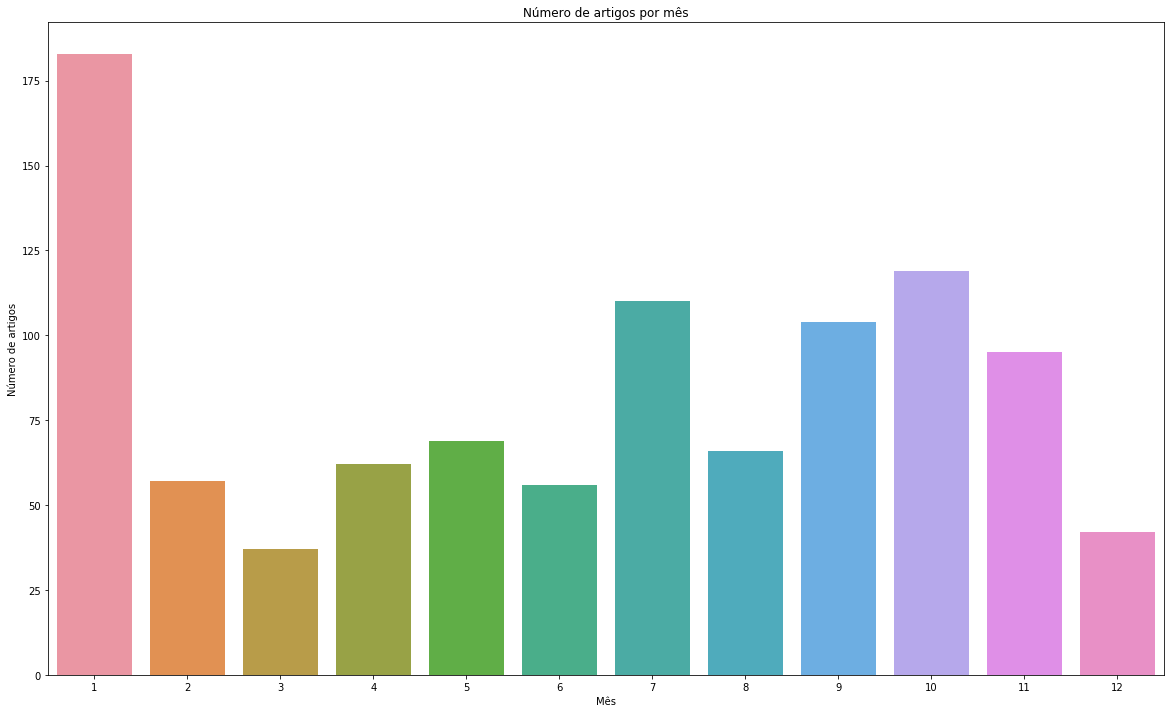

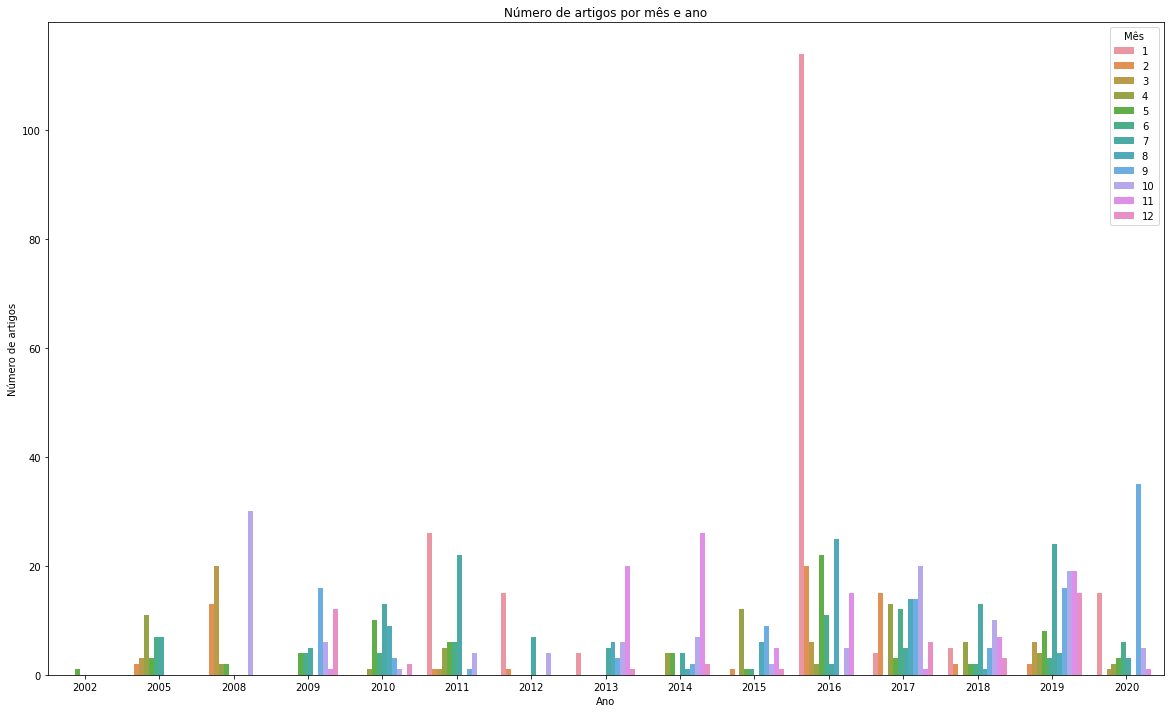

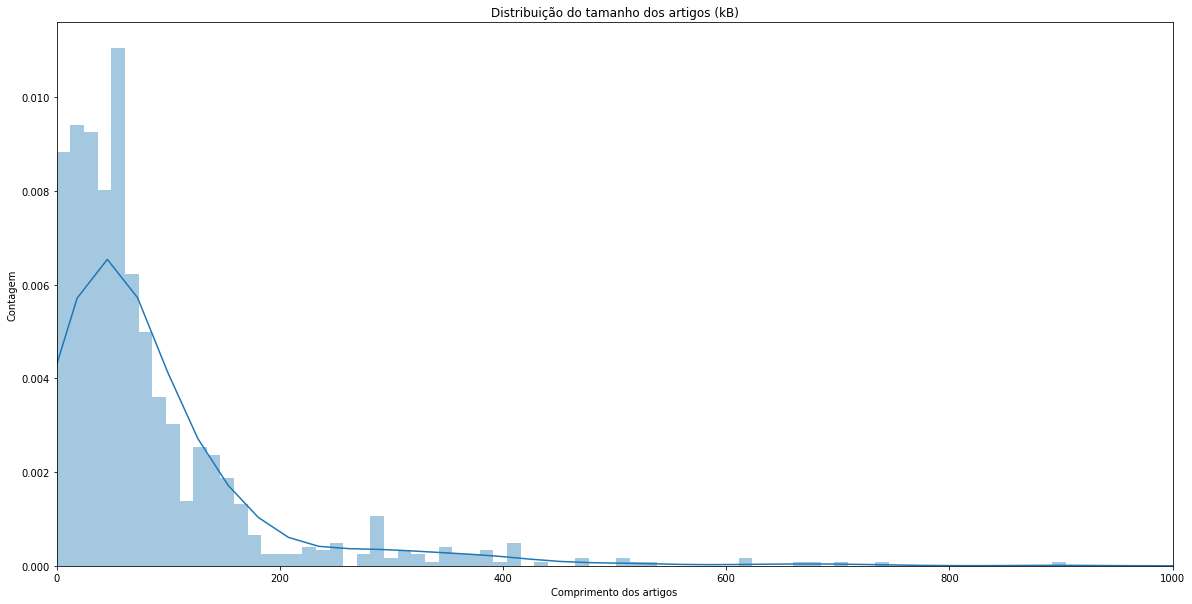

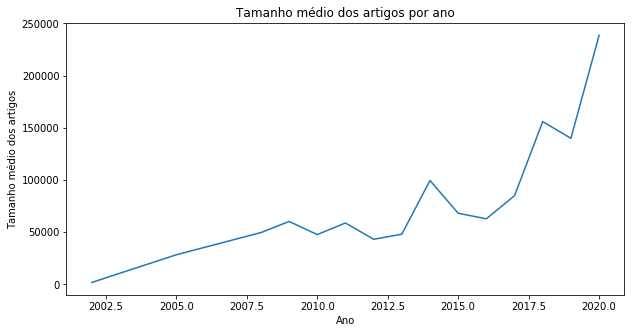

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], unit='s')

# Create year and month columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Plot the number of articles per year
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df)
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

# Plot the number of articles per month
plt.figure(figsize=(20, 12))
sns.countplot(x='month', data=df)
plt.title('Número de artigos por mês')
plt.xlabel('Mês')
plt.ylabel('Número de artigos')
plt.show()

# Plot the number of articles per year and month
plt.figure(figsize=(20, 12))
sns.countplot(x='year', hue='month', data=df)
plt.title('Número de artigos por mês e ano')
plt.xlabel('Ano')
plt.ylabel('Número de artigos')
plt.legend(title='Mês')
plt.show()

# Plot the distribution of article lengths
plt.figure(figsize=(20, 10))
sns.distplot(df['contentLength']/1000, bins=200)
plt.title('Distribuição do tamanho dos artigos (kB)')
plt.xlabel('Comprimento dos artigos')
plt.ylabel('Contagem')
plt.xlim(0,1000)
plt.show()

# Plot the average article length per year
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='contentLength', data=df.groupby('year').mean().reset_index())
plt.title('Tamanho médio dos artigos por ano')
plt.xlabel('Ano')
plt.ylabel('Tamanho médio dos artigos')
plt.show()

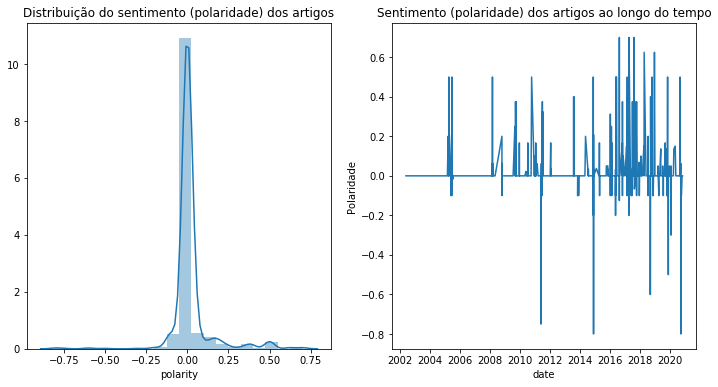

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply function to 'snippet' column
df['polarity'] = df['snippet'].apply(get_polarity)

# Create subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plot sentiment distribution
sns.distplot(df['polarity'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Distribuição do sentimento (polaridade) dos artigos')

# Plot sentiment over time
sns.lineplot(data=df, x='date', y='polarity', ax=axs[1])
axs[1].set_title('Sentimento (polaridade) dos artigos ao longo do tempo')
axs[1].set_ylabel('Polaridade')

plt.show()
